In [1]:
# !pip install graphviz
from graphviz import Digraph

In [2]:
from miniKeras.unit import Variable

In [3]:
from graphviz import Digraph
def getAll(root):
    nodes, edges = set(), set()
    def helper(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                helper(child)
    helper(root)
    return nodes, edges

def draw_graph(root, form='svg', direc='LR'):
    assert direc in ['LR', 'TB']
    nodes, edges = getAll(root)
    dot = Digraph(format=form, graph_attr={'rankdir':direc})
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.name, n.val, n.grad), shape='record')
        if n.op:
            dot.node(name=str(id(n)) + n.op, label=n.op)
            dot.edge(str(id(n)) + n.op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)
    
    return dot

In [4]:
# A simple example of visualization
a = Variable(1,name='a')
b = Variable(2,name='b')
c = Variable(3, name='c')
d = Variable(4, name='d')
ab = a*b
ab.name='ab'
cd = c*d
cd.name='cd'
abcd = ab+cd
abcd.name='ab+cd'

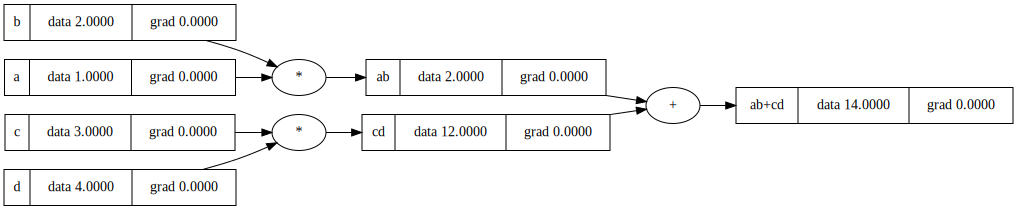

In [5]:
draw_graph(abcd)

In [6]:
# Single backprop
abcd.backprop()

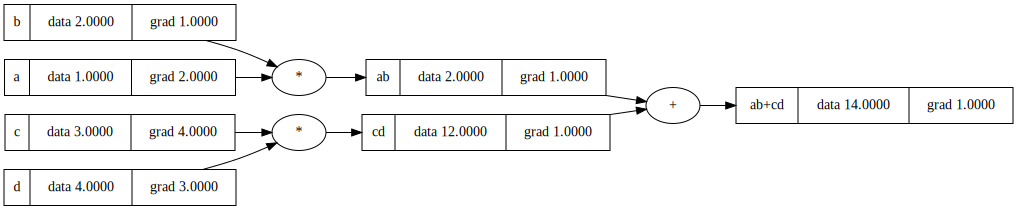

In [7]:
draw_graph(abcd)